### The Three-Body Problem

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

G = 6.6726*10**(-11)    # gravitational constant
m_E = 5.9742*10**24     # mass of the earth
m_M = 7.35*10**22       # mass of the moon
d = 3.844*10**8         # distance from the moon to the earth


In [17]:
def accel(x,y,x_E,y_E,x_M,y_M,x_dir = True):   

    '''
    Function for finding the cartesian acceleration of a light body orbiting two heavier bodies

    Args:
        x (float): x position of the satellite
        y (float): y position of the satellite
        x_E (float): x position of the Earth
        y_E (float): y position of the Earth
        x_M (float): x position of the Moon
        y_M (float): y position of the Moon
        x_dir (bool): if True, calculates the acceleration in x direction, otherwise calculates the acceleration in the y direction

    Returns:
        acceleration (float): the magnitude of the acceleration in either the x or y direction    
    '''

    D_E = np.sqrt((x-x_E)**2 + (y-y_E)**2)
    D_M = np.sqrt((x-x_M)**2 + (y-y_M)**2)
    
    if x_dir:
        accelation = -G*m_E*(x-x_E)/D_E**3 - G*m_M*(x-x_M)/D_M**3
    else:
        accelation = -G*m_E*(y-y_E)/D_E**3 - G*m_M*(y-y_M)/D_M**3
    return accelation

In [9]:
def taylor(r,v,a, r_E, r_M, T):

    '''
    Uses the taylor expansion method to find the position of the satellite at each time step.

    Args:
        r (float): the initial distance of the satellite from the Earth-Moon barycentre
        v (float): the initial speed of the satellite
        a (float): the time step
        r_E (float): the distance of the Earth from the Earth-Moon barycentre
        r_M (float): the distance of the Moon from the Earth-Moon barycentre
        T (float): the time period over which the simulation is run
    
    Returns:
        [xs,ys] (array): the x and y positions of the satellite at each time step
        [x_E,y_E] (array): the x and y positions of the Earth at each time step
        [x_M,y_M] (array): the x and y positions of the Moon at each time step

    '''

    #initialise the cartesian position and velocity components.
    x = r  
    y = 0
    v_x = 0
    v_y = v
    
    #create lists for storing the bodies positions
    xs = []
    ys = []

    x_E = []
    y_E = []

    x_M = []
    y_M = []

    n = int(T/a)   #number of time steps
    times = np.linspace(0,T,n)    #create an array of times over which the simulation is run

    for i in range(n):

        #calculate the cartesian coordinates of the Earth and Moon
        x_E.append(r_E*np.cos(2*np.pi/T*times[i]))
        y_E.append(r_E*np.sin(2*np.pi/T*times[i]))
        x_M.append(r_M*np.cos(2*np.pi/T*times[i]))
        y_M.append(r_M*np.sin(2*np.pi/T*times[i]))
        
        xs.append(x)
        ys.append(y)
        
        #using the Taylor expansion method, calculate the new position and speed of the satellite
        x_new = x+a*v_x + (a**2/2)*accel(x,y,x_E[i],y_E[i],x_M[i],y_M[i], True)
        y_new = y+a*v_y + (a**2/2)*accel(x,y,x_E[i],y_E[i],x_M[i],y_M[i], False) 

        v_x = v_x + a*accel(x,y,x_E[i],y_E[i],x_M[i],y_M[i], True)
        v_y = v_y + a*accel(x,y,x_E[i],y_E[i],x_M[i],y_M[i], False)

        #update the current position of the satellite
        x = x_new
        y = y_new
    
    return np.array([xs,ys]), np.array([x_E,y_E]), np.array([x_M, y_M])

In [10]:
def RK(r,v,a, r_E, r_M, T):

    '''
    Uses the fourth order Runge Kutta method to find the position of the satellite at each time step.

    Args:
        r (float): the initial distance of the satellite from the Earth-Moon barycentre
        v (float): the initial speed of the satellite
        a (float): the time step
        r_E (float): the distance of the Earth from the Earth-Moon barycentre
        r_M (float): the distance of the Moon from the Earth-Moon barycentre
        T (float): the time period over which the simulation is run
    
    Returns:
        [xs,ys] (array): the x and y positions of the satellite at each time step
        [x_E,y_E] (array): the x and y positions of the Earth at each time step
        [x_M,y_M] (array): the x and y positions of the Moon at each time step

    '''
    
    #initialise the cartesian position and velocity components.
    x = r
    y = 0
    v_x = 0
    v_y = v

    #create lists for storing the bodies positions
    xs = []
    ys = []

    x_E = []
    y_E = []

    x_M = []
    y_M = []

    n = int(T/a)   #number of time steps
    times = np.linspace(0,T,n)    #create an array of times over which the simulation is run
    
    for i in range(n):

        #calculate the cartesian coordinates of the Earth and Moon
        x_E.append(r_E*np.cos(2*np.pi/T*times[i]))
        y_E.append(r_E*np.sin(2*np.pi/T*times[i]))
        x_M.append(r_M*np.cos(2*np.pi/T*times[i]))
        y_M.append(r_M*np.sin(2*np.pi/T*times[i]))
        
        xs.append(x)
        ys.append(y)
        
        #calculate the new position and speed of the satellite
        accel_x = accel(x,y,x_E[i],y_E[i],x_M[i],y_M[i], True)
        accel_y = accel(x,y,x_E[i],y_E[i],x_M[i],y_M[i], False)
        
        z_x_1 = x + (a/2)*v_x
        z_vx_1 = v_x + (a/2)*accel_x
        
        z_y_1 = y + (a/2)*v_y
        z_vy_1 = v_y + (a/2)*accel_y
        
        z_accx_1 = accel(z_x_1,z_y_1,x_E[i],y_E[i],x_M[i],y_M[i], True)
        z_accy_1 = accel(z_x_1,z_y_1,x_E[i],y_E[i],x_M[i],y_M[i], False)
        
        z_x_2 = x + (a/2)*z_vx_1
        z_vx_2 = v_x + (a/2)*z_accx_1
        
        z_y_2 = y + (a/2)*z_vy_1
        z_vy_2 = v_y + (a/2)*z_accy_1
        
        z_accx_2 = accel(z_x_2,z_y_2,x_E[i],y_E[i],x_M[i],y_M[i], True)
        z_accy_2 = accel(z_x_2,z_y_2,x_E[i],y_E[i],x_M[i],y_M[i], False)
        
        z_x_3 = x + a*z_vx_2
        z_vx_3 = v_x + a*z_accx_2
        
        z_y_3 = y + a*z_vy_2
        z_vy_3 = v_y + a*z_accy_2
        
        z_accx_3 = accel(z_x_3,z_y_3,x_E[i],y_E[i],x_M[i],y_M[i], True)
        z_accy_3 = accel(z_x_3,z_y_3,x_E[i],y_E[i],x_M[i],y_M[i], False)


        #update the position and speed of the satellite
        x = x + (a/6)*(v_x+2*z_vx_1+2*z_vx_2+z_vx_3)
        v_x = v_x + (a/6)*(accel_x + 2*z_accx_1 + 2*z_accx_2 + z_accx_3)
        
        y = y + (a/6)*(v_y+2*z_vy_1+2*z_vy_2+z_vy_3)
        v_y = v_y + (a/6)*(accel_y + 2*z_accy_1 + 2*z_accy_2 + z_accy_3)
        
    return np.array([xs,ys]), np.array([x_E, y_E]), np.array([x_M, y_M])

We use the numerical methods to find the optimal starting position of the satellite to ensure a stable orbit - i.e. it doesn't crash into the moon or earth, or fly out into space.

We use an initial distance of the satellite from the moon of,

 $r_{L2} = d \times (m_M / 3 m_E)^{1/3}$. 
 
We change the distance between the moon-earth barycentre and the satellite as $r = C \times r_{L2} + r_M$, finding the value of $C$ that minimises the distance between the start and end position of the satellite after one orbit. We find $C$ correct to 7 decimal places using $scipy.optimize$ for both the Taylor and Runge-Kutta methods. For each value of $r$, the initial circular velocity of the satellite is given by $v = 2 \pi r/T$. 

In [ ]:
r_L2 = d*(m_M/(3*m_E))**(1/3)  #starting position of satellite
a = 2  #time step to use

r_E = d*m_M/(m_M+m_E)
r_M = d*m_E/(m_M+m_E)

T = np.sqrt(4*np.pi**2*d**3/(G*(m_M+m_E)))  #orbital period of Earth-Moon system found using Kepler's law

In [ ]:
#Function determining the change in satellite position over 1 orbit
def function_to_minimise(c):
    r = r_L2*c + r_M       #initialise starting position and circular velocity for each value of c
    v = 2*np.pi*r/T
    satellite_position = taylor(r,v, a, r_E, r_M, T)
    return np.linalg.norm(satellite_position[:,-1] -satellite_position[:,-0])

from scipy.optimize import minimize_scalar
res = minimize_scalar(function_to_minimise, bounds = (1,1.2), options={'xatol': 1e-0})   #we know from brute force that C lies between 1 and 1.1.

We find that we need a value of $C$ correct to 7 significant figures for a stable orbit, with $C = 1.075377$ for the Taylor expansion and $C = 1.075383$ for the RK4 method. We find the resulting satellite orbits and plot them against the Moon and Earth orbits.

In [ ]:
r = r_L2*1.075377 + r_M

v = 2*np.pi*r/T   #find the circular velocity of the satellite assuming period of orbit the same as the Moon-Earth system

sat_taylor, earth, moon = taylor(r,v, a, r_E, r_M, T)

r = r_L2*1.075383 + r_M 
v = 2*np.pi*r/T 

sat_RK, earth, moon = RK(r,v, a, r_E, r_M, T)

C:\Users\emmak\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


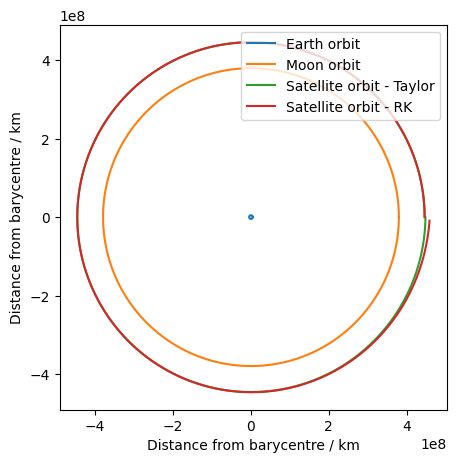

In [16]:
plt.figure(figsize = (5,5))

plt.plot(earth[0],earth[1], label = 'Earth orbit')
plt.plot(moon[0],moon[1], label = 'Moon orbit')
plt.plot(sat_taylor[0],sat_taylor[1], label = 'Satellite orbit - Taylor')
plt.plot(sat_RK[0],sat_RK[1], label = 'Satellite orbit - RK')


plt.xlabel('Distance from barycentre / km')
plt.ylabel('Distance from barycentre / km')

plt.legend()
plt.show()